# Shipwrecks

<https://data.marine.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.5131>

In [1]:
import os
from zipfile import ZipFile

import contextily as cx
import matplotlib.pyplot as plt

from h2ss import data as rd

In [10]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "shipwrecks")

FILE_NAME = "IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip"

URL = (
    "https://gsi.geodata.gov.ie/downloads/Marine/Data/Downloads/Shapefiles/"
    + FILE_NAME
)

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip' already exists in 'data/shipwrecks'.
Data downloaded on: 2023-10-29 16:58:36.620926+00:00
Download URL: https://gsi.geodata.gov.ie/downloads/Marine/Data/Downloads/Shapefiles/IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip
SHA256 hash: 981e15971fef419a1ee542f70d8114934e46c79571426890ec43b1694edbbc38



In [4]:
ZipFile(DATA_FILE).namelist()

['IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.cpg',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.dbf',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.prj',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sbn',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sbx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shp',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shp.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.shx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.lyr',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.lyr.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.lyrx',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.qml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.sld',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.style',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.style.xml',
 'IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.stylx',
 'ie_gsi_mi_shipwrecks_ie_waters_wgs84_lat.stylx.xml']

In [5]:
data = rd.read_shapefile_from_zip(data_path=os.path.join(DATA_FILE))

In [6]:
data.head()

,SHIPWK_ID,SURVEY_ID,LATITUDE,LONGITUDE,WRECKLEN_M,WRECKWID_M,H2ODEPTH_M,VESSELNAME,VESSELTYPE,DATE_LOSS,GSI_REF,NMS_REF,COMMENTS,URL_PDF,URL_IMAGE,URL3DMODEL,REPORTTYPE,geometry
0,IE_GSI_shipwk_ID_117,CE04_04,55.49957,-7.43245,65.0,7.0,56.863,U-218,Submarine (Deadlight),1945-12-04,117,W10125,Wreck,None,https://gsi.geodata.gov.ie/downloads/Marine/Da...,None,Image,POINT (-7.43245 55.49957)
1,IE_GSI_shipwk_ID_118,CE04_04,55.31280,-6.89522,143.0,23.0,60.169,None,Unknown,None,118,None,Elongate but curved and wide like rock,None,https://gsi.geodata.gov.ie/downloads/Marine/Da...,None,Image,POINT (-6.89522 55.31280)
2,IE_GSI_shipwk_ID_2,CE03_01,55.80613,-9.22711,123.0,27.0,137.248,None,Unknown,None,2,None,Wreck,None,https://gsi.geodata.gov.ie/downloads/Marine/Da...,None,Image,POINT (-9.22711 55.80613)
3,IE_GSI_shipwk_ID_3,CE03_02,55.97290,-8.76272,50.0,8.5,132.226,None,Unknown,None,3,None,Wreck,None,https://gsi.geodata.gov.ie/downloads/Marine/Da...,None,Image,POINT (-8.76272 55.97290)
4,IE_GSI_shipwk_ID_5,CE03_02,55.94973,-8.19291,75.0,18.0,173.479,Gi-ara,Cargo Vessel,None,5,None,Wreck,None,https://gsi.geodata.gov.ie/downloads/Marine/Da...,None,Image,POINT (-8.19291 55.94973)


In [7]:
data.shape

(497, 18)

In [8]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

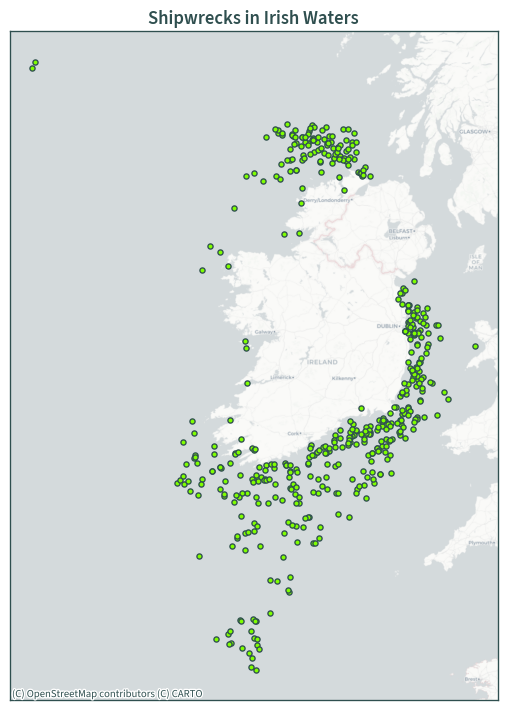

In [11]:
ax = data.to_crs(3857).plot(
    figsize=(7.5, 7.5),
    edgecolor="darkslategrey",
    markersize=15,
    color="chartreuse",
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title("Shipwrecks in Irish Waters")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()